In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing Dataset

In [2]:
data = pd.read_csv('dataset.csv')

In [3]:
data.head()

,class_bot,id,statuses_count,followers_count,friends_count,favourites_count,listed_count,default_profile,default_profile_image,geo_enabled,...,reply_status_ratio,avg_urls_status_ratio,avg_mentions_status_ratio,avg_favorite_status_ratio,account_age,followers_account_age_ratio,friends_account_age_ratio,statuses_account_age_ratio,favourites_account_age_ratio,lists_account_age_ratio
0,0,678033,45825,7065,1822,3804,596,0.0,0.0,0.0,...,0.023655,0.000006,0.000024,0.000011,127286.0,0.055505,0.014314,0.360016,0.029885,0.004682
1,0,722623,11770,1577,678,634,47,0.0,0.0,1.0,...,0.076381,0.000014,0.000060,0.000035,127119.0,0.012406,0.005334,0.092590,0.004987,0.000370
2,0,755116,39158,623,529,42,37,0.0,0.0,0.0,...,0.042495,0.000003,0.000024,0.000004,126923.0,0.004908,0.004168,0.308518,0.000331,0.000292
3,0,755746,18035,1620,591,361,72,0.0,0.0,1.0,...,0.062212,0.000026,0.000038,0.000005,126899.0,0.012766,0.004657,0.142121,0.002845,0.000567
4,0,785080,22496,821,552,5897,29,0.0,0.0,0.0,...,0.061655,0.000003,0.000035,0.000023,126567.0,0.006487,0.004361,0.177740,0.046592,0.000229


In [24]:
data.shape

(8386, 69)

#### Data Pre-processing

In [8]:
df = data.drop('id',axis=1) #id column in dropped from the dataset

In [9]:
df.head()

,class_bot,statuses_count,followers_count,friends_count,favourites_count,listed_count,default_profile,default_profile_image,geo_enabled,profile_use_background_image,...,reply_status_ratio,avg_urls_status_ratio,avg_mentions_status_ratio,avg_favorite_status_ratio,account_age,followers_account_age_ratio,friends_account_age_ratio,statuses_account_age_ratio,favourites_account_age_ratio,lists_account_age_ratio
0,0,45825,7065,1822,3804,596,0.0,0.0,0.0,0.0,...,0.023655,0.000006,0.000024,0.000011,127286.0,0.055505,0.014314,0.360016,0.029885,0.004682
1,0,11770,1577,678,634,47,0.0,0.0,1.0,1.0,...,0.076381,0.000014,0.000060,0.000035,127119.0,0.012406,0.005334,0.092590,0.004987,0.000370
2,0,39158,623,529,42,37,0.0,0.0,0.0,1.0,...,0.042495,0.000003,0.000024,0.000004,126923.0,0.004908,0.004168,0.308518,0.000331,0.000292
3,0,18035,1620,591,361,72,0.0,0.0,1.0,1.0,...,0.062212,0.000026,0.000038,0.000005,126899.0,0.012766,0.004657,0.142121,0.002845,0.000567
4,0,22496,821,552,5897,29,0.0,0.0,0.0,1.0,...,0.061655,0.000003,0.000035,0.000023,126567.0,0.006487,0.004361,0.177740,0.046592,0.000229


In [33]:
print(df.isnull().sum()) #there are no null values in the dataset

class_bot                       0
statuses_count                  0
followers_count                 0
friends_count                   0
favourites_count                0
                               ..
followers_account_age_ratio     0
friends_account_age_ratio       0
statuses_account_age_ratio      0
favourites_account_age_ratio    0
lists_account_age_ratio         0
Length: 68, dtype: int64


In [39]:
class_0_count = len(data[data['class_bot'] == 0])
print(class_0_count)
class_1_count = len(data[data['class_bot'] == 1])
print(class_1_count)

3474
4912


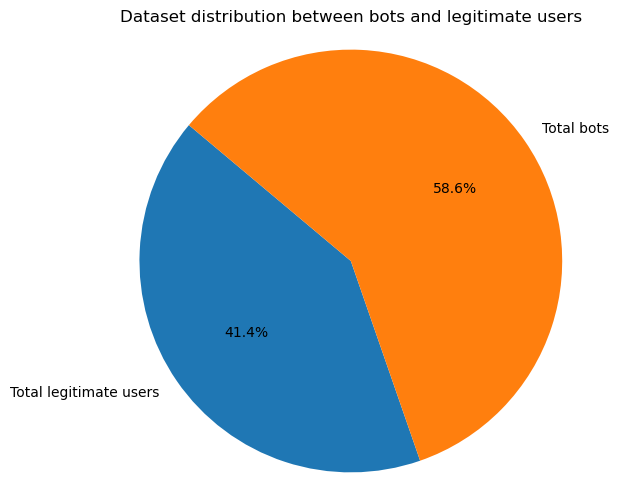

In [40]:
values = [class_0_count, class_1_count]
labels = ['Total legitimate users', 'Total bots']

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Dataset distribution between bots and legitimate users')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the pie chart
plt.show()

#### Extracting importing features for training the model

In [11]:
train_attr = df.iloc[:, 1:]
train_label = df[['class_bot']]

In [12]:
train_attr.head()

,statuses_count,followers_count,friends_count,favourites_count,listed_count,default_profile,default_profile_image,geo_enabled,profile_use_background_image,profile_background_tile,...,reply_status_ratio,avg_urls_status_ratio,avg_mentions_status_ratio,avg_favorite_status_ratio,account_age,followers_account_age_ratio,friends_account_age_ratio,statuses_account_age_ratio,favourites_account_age_ratio,lists_account_age_ratio
0,45825,7065,1822,3804,596,0.0,0.0,0.0,0.0,1.0,...,0.023655,0.000006,0.000024,0.000011,127286.0,0.055505,0.014314,0.360016,0.029885,0.004682
1,11770,1577,678,634,47,0.0,0.0,1.0,1.0,1.0,...,0.076381,0.000014,0.000060,0.000035,127119.0,0.012406,0.005334,0.092590,0.004987,0.000370
2,39158,623,529,42,37,0.0,0.0,0.0,1.0,0.0,...,0.042495,0.000003,0.000024,0.000004,126923.0,0.004908,0.004168,0.308518,0.000331,0.000292
3,18035,1620,591,361,72,0.0,0.0,1.0,1.0,1.0,...,0.062212,0.000026,0.000038,0.000005,126899.0,0.012766,0.004657,0.142121,0.002845,0.000567
4,22496,821,552,5897,29,0.0,0.0,0.0,1.0,0.0,...,0.061655,0.000003,0.000035,0.000023,126567.0,0.006487,0.004361,0.177740,0.046592,0.000229


In [30]:
plt.figure(figsize=(20,10))

<Figure size 2000x1000 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

In [32]:
print(train_attr.corr())

                              statuses_count  followers_count  friends_count  \
statuses_count                      1.000000         0.256222       0.170258   
followers_count                     0.256222         1.000000       0.256270   
friends_count                       0.170258         0.256270       1.000000   
favourites_count                    0.378781         0.033715       0.073621   
listed_count                        0.267620         0.597443       0.380088   
...                                      ...              ...            ...   
followers_account_age_ratio         0.263356         0.990527       0.303583   
friends_account_age_ratio           0.158591         0.254374       0.988330   
statuses_account_age_ratio          0.980803         0.221774       0.164322   
favourites_account_age_ratio        0.375413         0.031535       0.070130   
lists_account_age_ratio             0.270639         0.569346       0.400819   

                              favourite

In [13]:
train_label.head()

,class_bot
0,0
1,0
2,0
3,0
4,0


### Splitting the data into test and train

In [14]:
from sklearn.model_selection import train_test_split 
from sklearn import metrics 

In [15]:
X_train, X_test, y_train, y_test = train_test_split(train_attr, train_label, test_size=0.2, random_state=1) 

### Decision Tree Classifier

In [16]:
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier

In [17]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)


In [18]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9898688915375446


#### Accuracy: 98.98%

### Random Forest Classifier

In [19]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
clf = RandomForestClassifier()

In [21]:
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

c:\Users\kisha\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [22]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9946364719904648


#### Accuracy: 99.46%